In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from collections import Counter
from scipy import stats
import numpy as np
import plotly
# set style
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
plt.style.use('seaborn-pastel')
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
docs=json.load(open("data/docs.json","rb"))
entities=json.load(open("data/entities_meta.json","rb"))


In [3]:
docs=pd.DataFrame(docs)
print(entities.keys())

dict_keys(['people', 'organizations', 'locations'])


## Goal:
The goal of this project is to create an “overview” of the most important information in our dataset. A reader should be able to get up to speed on the major events that occurred in about 5 minutes or less.
 
## Questions
Part of the fun of being a Product Engineer is that we often have to solve problems with a varied level of initial definition. In general there are 3 broad buckets:
Clearly defined need and feature definition
Clearly defined need by loose product definition
No defined need, but feeling like something more is needed
 
We hope to give you the ability to experience a little bit of each of these in the next three questions


## Question 1)
Given the list documents, create a time-series of document volume for wildfires for the time span of the query.

In [4]:
docs.head()

,event_id,content,title,date,sources,people,organizations,locations,id,summary
0,4a68a737-a357-47ea-a4b9-afe4f3c1f460,"FLAGSTAFF, Ariz. -- An excavator used to clea...",Spark from wildfire-prevention efforts likely ...,2019-09-13T18:17:35Z,[ABC7NY],"[8e7aff20-4281-5023-8407-f43e5ba289e4, 4fc245e...",[9d4d391e-a27d-4b76-a783-7ce20c9160a0],"[28152159-6443-50c6-864c-f6e9920c9232, 15f3e2e...",7ac25cda-aec2-5af1-a937-4fee15ea35ba,The excavator was working on steep slopes near...
1,3b4e3874-2034-4cc7-9929-09d60f1092e7,“Wildfire raging through the Paradise region i...,Conditions of the California wildfire reflect ...,2018-11-16T12:53:23Z,[ShowMe Plettenberg Bay],"[0aa3184c-c835-5afa-a5e7-656c37a08a7b, 193958f...",[153dc210-6604-4db6-b374-d9167690f2cf],"[dfbf9ad3-9e72-5ba9-99ac-fd32ca480ac1, 2ac73e0...",b04dba07-ffc0-5a49-be3b-6eaaf57150e2,"""Wildfire raging through the Paradise region i..."
2,d3c463cc-0b2f-4e51-9f99-f2f6cfc90d0f,Montanans were fortunate this year’s wildfire ...,"Hazardous homes increasing wildfire risks, costs",2018-09-27T19:14:34Z,[Bozeman Daily Chronicle],[a9637d0a-7c6a-5eeb-8f5c-947d3fea81bd],[81029b9e-056b-4213-8595-f53c7555d4ae],"[1709e49c-551f-5a2d-87a2-d84942ac24a0, 7534d4a...",71e746b0-9de5-5602-a7ca-deceb760ab83,"In Gallatin County there are 3,848 homes in ar..."
3,0d357eaa-cf9c-406b-a551-503832c6dd5b,1 Introduction \nLarge wildfires are increasi...,"Resilience to Large, “Catastrophic” Wildfires ...",2020-07-09T12:13:46Z,[Earth's Future],"[6eac2fd9-b19b-5a66-b2a0-cfba00919fc9, 8cdbbf2...","[5eb2f096-ed8a-4aa9-9f8d-e2bdb45cd7da, 6a97278...","[7b656f8b-97f4-5ca3-b533-2d9030312b44, 04557f0...",4d73f52b-d24d-5314-952e-5d42272c470b,"First, we expect that vegetation functional gr..."
4,f0365861-6f2f-42bc-a0ef-35d2c5e52d00,Discussing wildfire protection and management ...,"Rod Rose, Bushfire Management Expert",2020-04-28T16:01:45Z,[CSR Wire],[d18aeb90-b77f-5f80-aaa9-98058b97d922],"[8f808d10-96da-41fa-a477-62802c44b98f, fb58c4b...","[4fbe630c-4a31-5847-a4c0-333ad0fb9072, 7b656f8...",05c861d4-887a-544e-a309-ae9fe36e4366,Rod won the Fire Protection Association of Aus...


In [5]:
locations={x["id"]:x for x in entities["locations"]}
organizations={x["id"]:x for x in entities["organizations"]}
people={x["id"]:x for x in entities["people"]}

entities={"locations":(locations, "name"),
         "organizations":(organizations,"display_organization"),
         "people":(people,"display_person")}

In [6]:
# Explore number of missing values
print(docs.isnull().sum())

event_id           0
content            0
title              0
date               0
sources            0
people             0
organizations      0
locations          0
id                 0
summary          107
dtype: int64


## Preprocessing

Text(0.5, 1.0, 'Time-series of document volume for wildfires')

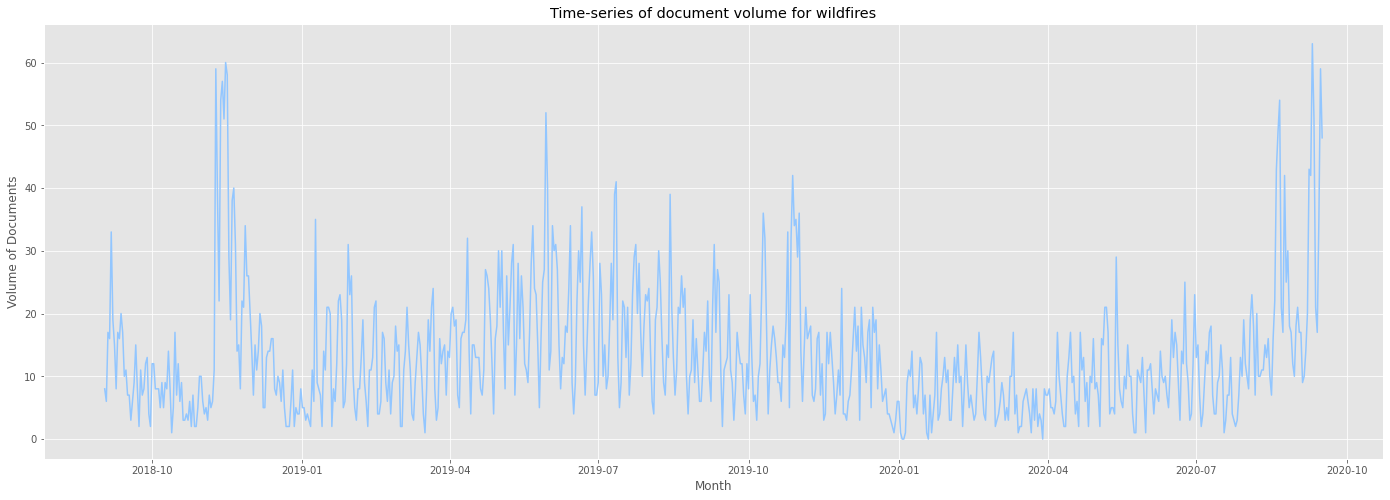

In [8]:
## Time Series of volume of documents
document_count=docs.groupby(pd.Grouper(key="date", freq="d")).count()["id"].iloc[1:-1]
fig=plt.figure(figsize=(24,8))
plt.plot(document_count)
plt.ylabel("Volume of Documents")
plt.xlabel("Month")
plt.title("Time-series of document volume for wildfires")

## Question 2)
The time-series from Question 1 shows that there is always some coverage of wildfires, but the volume varies throughout the year, peaking at certain points. We’d like to highlight the important news that happened at those peaks. Develop an algorithm or heuristic to pick the events that happen at the peaks. Remember, the goal of this Overview page is to give someone a 5 minute catch up on the history that led us to today, so we want to limit the amount of information we display to just the most important. Decide how you would like to present the events.
At Primer, we productionize tools to discover insight from data. Make sure your code would be easily understandable to your co-workers.

In [13]:
from scipy.signal import argrelextrema
import spacy
class Wildfire_News:
    def __init__(self, data):
        self.data=data
        
    def preprocessing(self):
        # Convert date to pd.TimeStamp
        self.data["date"]=pd.to_datetime(self.data["date"])
        
    def document_count(self, freq="d"):
        return self.data.groupby(pd.Grouper(key="date", freq=freq)).count()["id"]
    
    def document_count_plot(self, document_count):    
        fig=plt.figure(figsize=(24,8))
        plt.plot(document_count)
        plt.ylabel("Volume of Documents")
        plt.xlabel("Month")
        plt.title("Time-series of document volume for wildfires")
        plt.legend()
        
    def find_peaks(self, document_count,freq="d",order=180, plot=True):
        peaks=argrelextrema(document_count.values,comparator=np.greater,order=order)
        peaks=document_count.iloc[peaks]
        if plot:
            self.document_count_plot(document_count)
            plt.scatter(peaks.index, peaks, color="red", marker="*", label="Peaks")
        return peaks
    

No handles with labels found to put in legend.


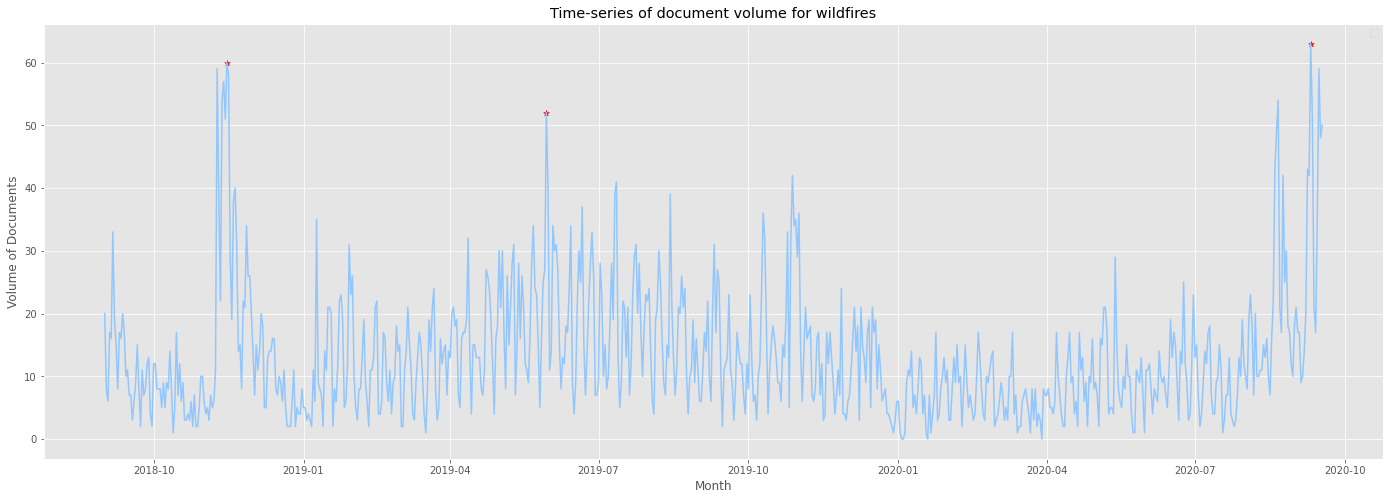

In [14]:
# define class
news_class=Wildfire_News(docs)

# get time series of document_count
document_count=news_class.document_count()

# find_peaks
peaks=news_class.find_peaks(document_count)


In [15]:
docs["date"].iloc[0].date()

datetime.date(2019, 9, 13)

In [238]:
peak1=docs.loc[docs["date"]==peaks.index[2]]

## Clustering Approach


In [239]:
from sklearn.metrics.pairwise import cosine_similarity

def get_embedding_matrix(keys, embedding_dic):
    result=[]
    for k in keys:
        result.append(embedding_dic[k])
    return np.array(result)

def closest_to_mean(doc_embedding):
    mean_embed=np.array(doc_embedding).mean(axis=0)
    distances=[]
    for x in doc_embedding:
        distances.append(cosine_similarity(mean_embed.reshape(1,-1), x.reshape(1,-1))[0,0])
    return np.argmax(distances), distances

In [240]:


title_docs=[]
dic_embedding={}
embeddings=[]
peak1=peak1.drop_duplicates(subset=["title"])#.dropna(subset=["title"])

for sentence in peak1["title"]:
    sent=nlp(sentence)
    title_docs.append(sent)
    dic_embedding[sentence]=sent.vector
    embeddings.append(sent.vector)
    

#### DBSCAN

In [241]:
from sklearn.cluster import DBSCAN

doc_embedding=np.array(list(dic_embedding.values()))
dbscan_clusters={}
for i in np.arange(0.1, 1.01, 0.01):
    dbscan=DBSCAN(eps=i, metric="cosine", min_samples=2).fit(doc_embedding)
    dbscan_clusters[i]=pd.Series(dbscan.labels_).nunique()

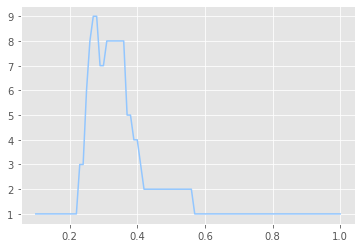

In [242]:
plt.plot(pd.Series(dbscan_clusters))

In [246]:
dbscan=DBSCAN(eps=0.6, metric="cosine", min_samples=2).fit(doc_embedding)
peak1["cluster"]=dbscan.labels_

### Only for TOP category

In [247]:
salient_input=peak1.loc[peak1["cluster"]==peak1["cluster"].value_counts().index[0], "title"]
embedding_salient=get_embedding_matrix(salient_input, dic_embedding)
index_max, distance=closest_to_mean(embedding_salient)

In [248]:
docs.loc[salient_input.index[index_max],"title"]

'Wildfire conditions complicate PG&E’s inspections during power shutoff'

### For all inputs

In [251]:
salient_input=peak1.loc[:, "title"]
embedding_salient=get_embedding_matrix(salient_input, dic_embedding)
index_max, distance=closest_to_mean(embedding_salient)

In [252]:
docs.loc[salient_input.index[index_max],"title"]

'Wildfire conditions complicate PG&E’s inspections during power shutoff'

In [254]:
docs.loc[salient_input.index[index_max],"summary"]

'While power has returned to most Pacific Gas and Electric Co. customers in Humboldt County, nearby wildfires, gusty winds and smoky conditions could prompt the utility to again de-energize inland and Southern Humboldt County areas, a representative said. Customers in Fort Seward, Blocksburg and Alderpoint will either remain without power or lose it anew due to hazardous conditions from the nearby Hopkins Fire, Contreras said. Contreras reiterated that the Humboldt Bay power plant this week spared nearly 67,000 PG&E customers in the county who lost power last year due to shutoffs.'

## Kmeans

In [255]:
from sklearn.cluster import DBSCAN, KMeans
doc_embedding=np.array(list(dic_embedding.values()))
dbscan_clusters={}
distortion={}
for i in np.arange(1, 10, 1):
    kmeans=KMeans(n_clusters=i).fit(doc_embedding)
    #kmeans=pd.Series(dbscan.labels_).nunique()
    distortion[i]=kmeans.inertia_

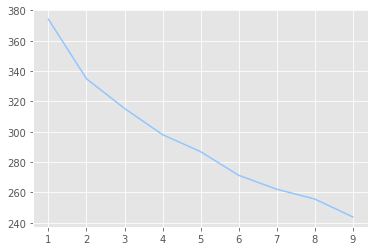

In [256]:
plt.plot(pd.Series(distortion))

In [257]:
kmeans=KMeans(n_clusters=5).fit(doc_embedding)
peak1["cluster"]=kmeans.labels_

In [258]:
salient_input=peak1.loc[peak1["cluster"]==peak1["cluster"].value_counts().index[0], "title"]
embedding_salient=get_embedding_matrix(salient_input, dic_embedding)
index_max, distance=closest_to_mean(embedding_salient)

In [260]:
docs.loc[salient_input.index[index_max],"title"]

'3 dead as wildfire explodes in Northern California'

# TDIF

In [261]:
from sklearn.feature_extraction.text import TfidfVectorizer
tdif=TfidfVectorizer(stop_words="english")
x=tdif.fit_transform(docs["title"])

In [262]:
peak_tdif=x[peak1.index]

In [263]:
index_max, distance=closest_to_mean(peak_tdif.todense())

In [264]:
peak1.iloc[index_max]["title"]

'Over 1,000 homes lost as fires rage in Western states; Residents forced to flee in Oregon and California'

# Count Vectorizer

In [265]:
from sklearn.feature_extraction.text import CountVectorizer
counter=CountVectorizer(analyzer='word',stop_words="english")
x=counter.fit_transform(docs["title"])


In [266]:
peak_counter=x[peak1.index]
index_max, distance=closest_to_mean(peak_counter.todense())

In [268]:
peak1.iloc[index_max]["title"]

'3 killed in massive California wildfire'

## ADD , organizations, places and people count_vectorizer to embedding

In [269]:
def entity_vectors(data, top_k=50):
    # people
    people_=CountVectorizer(analyzer='word', max_features=top_k).fit_transform([" ".join(x) for x in data["people"]])
    places_=CountVectorizer(analyzer='word',max_features=top_k).fit_transform([" ".join(x) for x in data["locations"]])
    return np.concatenate([people_.todense(), places_.todense()], axis=1)

In [270]:
#salient_input=peak1.loc[:, "content"]
embedding_salient=get_embedding_matrix(peak1["title"], dic_embedding)
entities_embed=entity_vectors(peak1)

embedding_salient=np.concatenate([embedding_salient, entities_embed], axis=1)

index_max, distance=closest_to_mean(embedding_salient)

In [271]:
docs.loc[peak1.index[index_max],"title"]

'FORESTS Lawmakers plead for federal help as Western fires rage'

## TOPIC MODELING

In [273]:
import re
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = nlp(document)
        tokens = [x.lemma_.lower() for x in document]
        tokens = [word for word in tokens if word not in stop_words]
        tokens = [word for word in tokens if len(word)  > 1]
        return tokens

In [279]:
peak1=docs.loc[docs["date"]==peaks.index[0]]

In [280]:
from collections import Counter
processed_data=[]
for doc in peak1["content"]:
    tokens = preprocess_text(doc)
    processed_data.append(tokens)

In [281]:
from collections import Counter
from itertools import chain
frequency=Counter(chain(*processed_data))

In [282]:
title_scores=[]
for doc in peak1["title"]:
    tokens = preprocess_text(doc)
    sent_score=0
    if len(tokens)>5:
        for token in tokens:
            if token in set(frequency.keys()):
                sent_score+=frequency[token]
    title_scores.append(sent_score/len(tokens))

In [283]:
peak1.iloc[np.argmax(title_scores)]["title"]

'Camp Fire vs. Tubbs Fire: The two most destructive fires in California history'

In [163]:
from gensim import corpora
#import pyLDAvis.gensim
#from pyLDAvis import gensim as pylda_gensim
#import pyLDAvis.gensim
gensim_dictionary = corpora.Dictionary(processed_data)
gensim_corpus = [gensim_dictionary.doc2bow(token, allow_update=True) for token in processed_data]

In [164]:
import gensim
import pyLDAvis
from pyLDAvis.gensim import prepare

In [165]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
lda_model = gensim.models.ldamodel.LdaModel(gensim_corpus, num_topics=12, id2word=gensim_dictionary, passes=15)

lda_visualization =prepare(lda_model, gensim_corpus, gensim_dictionary, sort_topics=False)
pyLDAvis.display(lda_visualization)

In [169]:
def format_topics_sentences(ldamodel=lda_model, corpus=gensim_corpus, texts=docs["title"]):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [170]:
df_topic_sents_keywords = format_topics_sentences()

In [171]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.5546,"wildfire, california, evacuation, northern, la...",Spark from wildfire-prevention efforts likely ...
1,1,2.0,0.4430,"wildfire, california, climate, change, firefig...",Conditions of the California wildfire reflect ...
2,2,9.0,0.4141,"wildfire, california, health, battle, protect,...","Hazardous homes increasing wildfire risks, costs"
3,3,5.0,0.6332,"wildfire, county, resident, control, burning, ...","Resilience to Large, “Catastrophic” Wildfires ..."
4,4,5.0,0.5208,"wildfire, county, resident, control, burning, ...","Rod Rose, Bushfire Management Expert"
5,5,6.0,0.3871,"forest, service, wildfire, national, managemen...",Bureau of Land Management asks for help preven...
6,6,3.0,0.6885,"wildfire, victim, bankruptcy, billion, califor...",Guest opinion: Oregon can avoid wildfire disas...
7,7,4.0,0.5877,"wildfire, california, prevent, weather, deadly...",The CFI Podcast: Michael Benson on wildfire re...
8,8,4.0,0.6167,"wildfire, california, prevent, weather, deadly...",Scientists Worry Agency Plan to Prevent Fires ...
9,9,1.0,0.7708,"wildfire, california, evacuation, northern, la...",Everglades wildfire spreads


In [173]:
df_dominant_topic.loc[peak1.index,"Dominant_Topic"].value_counts()

1.0     8
10.0    7
6.0     7
8.0     7
9.0     6
3.0     4
2.0     3
7.0     3
0.0     2
4.0     2
5.0     2
11.0    1
Name: Dominant_Topic, dtype: int64

In [155]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9237,"wildfire, alberta, northern, health, controlle...",2019-08-30 - WildFireSat: Enhancing Canada's a...
1,1.0,0.8577,"alberta, canadian, safety, burning, carbon, re...",Fight against wildfire
2,2.0,0.9604,"wildfire, california, utility, leader, liabili...",Community Agriculture Alliance: Are you prepar...


In [157]:
sent_topics_sorteddf_mallet.iloc[0]["Text"]

"2019-08-30 - WildFireSat: Enhancing Canada's ability to manage wildfires"

In [55]:
doc_lda = lda_model[gensim_corpus]

In [56]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()


In [131]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
import nltk
#import gensim
from gensim import corpora
import nltk
import gensim
from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('wordnet')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def sent_to_words(sentences):
    result=[]
    for sent in sentences:
        sent = re.sub('\s+', ' ', sent)
        sent = re.sub('\"', "", sent) 
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        result.append([word for word in sent if word not in stop_words])
    return result
        

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matiasb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/matiasb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [132]:
title_docs[0].ents

(Draft Wildfire Commission Report,)

# Question 3

In [134]:
def describe_entities(data, entities, peak_series, k=7):
    fig, axs = plt.subplots(1,3,figsize=(26,14))
    peak_data=data.loc[peak_series]
    width = 0.3
    for i, (entity_name, (entity_map, key_name))in enumerate(entities.items()):
        most_common_data=pd.Series(documents_to_entities(data[entity_name], entity_map, key_name, k=len(entity_map)))
        most_common_peak=pd.Series(documents_to_entities(peak_data[entity_name], entity_map, key_name, k=k))
        (most_common_peak/len(peak_data)*100).plot(kind="bar", ax=axs.flat[i], color="blue", width=width, label="Peak", position=0)
        (most_common_data[most_common_peak.index]/len(data)*100).plot(kind="bar", ax=axs.flat[i], color="red",width=width, label="Entire Dataset", position=1)
        axs.flat[i].legend()
        axs.flat[i].set_title(entity_name)
    plt.legend()
    plt.show()

In [135]:
describe_entities(docs, entities, query_dates(docs["date"],peaks[1]), k=10)

NameError: name 'query_dates' is not defined

In [ ]:
w=documents_to_entities(docs["locations"], entities["locations"][0], "id", k=500)

In [ ]:
points=[]
for key, value in w.items():
    lat=entities["locations"][0][key]["latitude"]
    long=entities["locations"][0][key]["longitude"]
    if np.isnan(lat):
        continue
    points.append([lat,long, value])

In [ ]:
geo=pd.DataFrame(points, columns=["latitude","longitude","count"])

In [ ]:
BBox = ((-146.876,  -60.743,      
         16.836, 58.211))

ruh_m = plt.imread("map.png")
fig, ax = plt.subplots(figsize = (24,24))
ax.scatter(geo.longitude, geo.latitude, zorder=1, alpha= 1.0, c='b', s=geo["count"],cmap=plt.get_cmap("jet"),label="Number of documents")
ax.set_title('Plotting Spatial Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

## Topic Modeling

In [ ]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
import nltk
#import gensim
from gensim import corpora
import nltk
from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('wordnet')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\s+', ' ', sent)
        sent = re.sub('\"', "", sent) 
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        return [lemmatize.lemmatize(w, get_wordnet_pos(w)) for w in sent if w not in set(stop_words)]
        
stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation) 
lemmatize = WordNetLemmatizer()

def cleaning(article):
    one = " ".join([i for i in article.lower().split() if i not in stopwords])
    two = "".join(i for i in one if i not in punctuation)
    return [lemmatize.lemmatize(w, get_wordnet_pos(w)) for w in two.split() if w not in string.punctuation]
    #return [lemmatize.lemmatize(i) for i in two.split()]

In [ ]:
lemmatize(docs["title"].iloc[5])

In [ ]:
lemmatize.lemmatize()

In [ ]:
from gensim.utils import lemmatize

In [ ]:
gensim.utils.lemmatize(gensim.utils.simple_preprocess(docs["content"].iloc[0]))

In [ ]:
import gensim

In [ ]:
lemmatize.lemmatize("saw", "VB")

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatize.lemmatize("saw",get_wordnet_pos("saw"))

In [ ]:
lemmatize("gone", allowed_tags=re.compile('.*'))

In [ ]:
from gensim.utils import lemmatize
sentence = "The striped bats were hanging on their feet and ate best fishes"
lemmatized_out = [wd.decode('utf-8').split('/')[0] for wd in lemmatize(sentence)]
#> ['striped', 'bat', 'be', 'hang', 'foot', 'eat', 'best', 'fish']